# 8

In [3]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
import pandas as pd

In [4]:
auto_data = load_data("auto")
auto_data[:1]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [5]:
design_matrix = MS(['horsepower']).fit(auto_data)
predictors = design_matrix.transform(auto_data)
predictors[:2]

,intercept,horsepower
0,1.0,130
1,1.0,165


In [6]:
y = auto_data['mpg']
linear_regression_model = sm.OLS(y, predictors)
results = linear_regression_model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2024-03-02 10:52 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
intercept     39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       17.305
Skew:                  0.492        Prob(JB):               0.000 
Kurtosis:              3.299        Condition No.:          322   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [7]:
to_predict = design_matrix.transform(pd.DataFrame({'horsepower':[98]}))
prediction = results.get_prediction(to_predict)
prediction.predicted_mean

array([24.46707715])

In [8]:
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [9]:
prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [10]:
from matplotlib.pyplot import subplots

def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

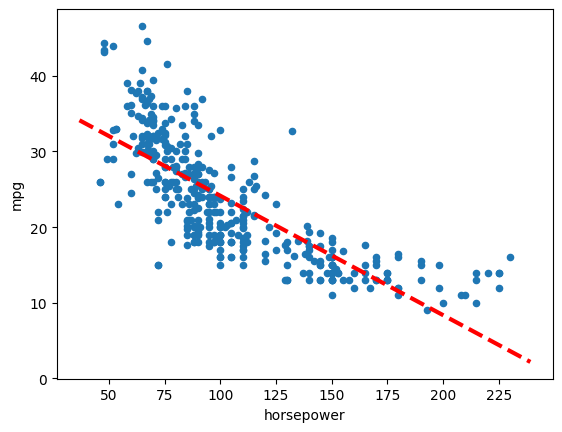

In [13]:
abline(auto_data.plot.scatter('horsepower','mpg'),
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

Text(0, 0.5, 'Residual')

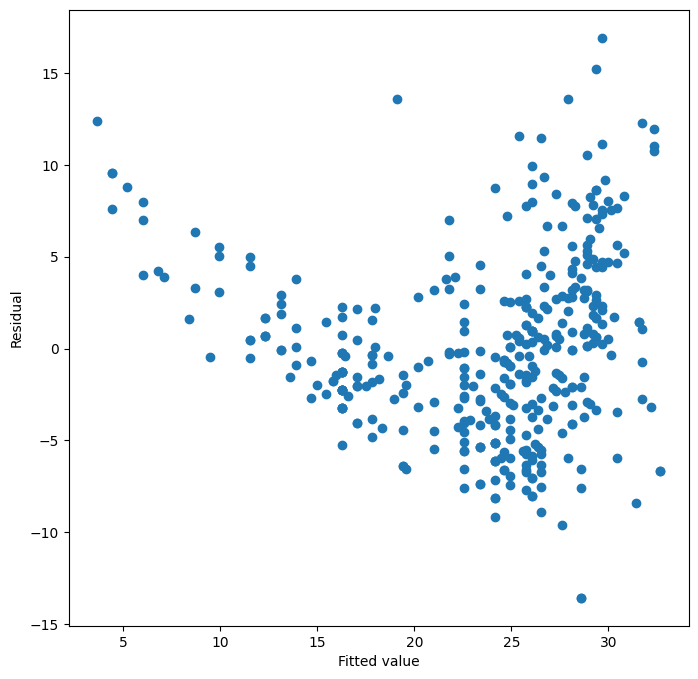

In [19]:
# check if there is a pattern in the residuals. If there is a pattern it means that it is not linear
fig,ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

# 9
This question involves the use of multiple linear regression on the
Auto data set.

In [43]:
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from matplotlib.pyplot import subplots

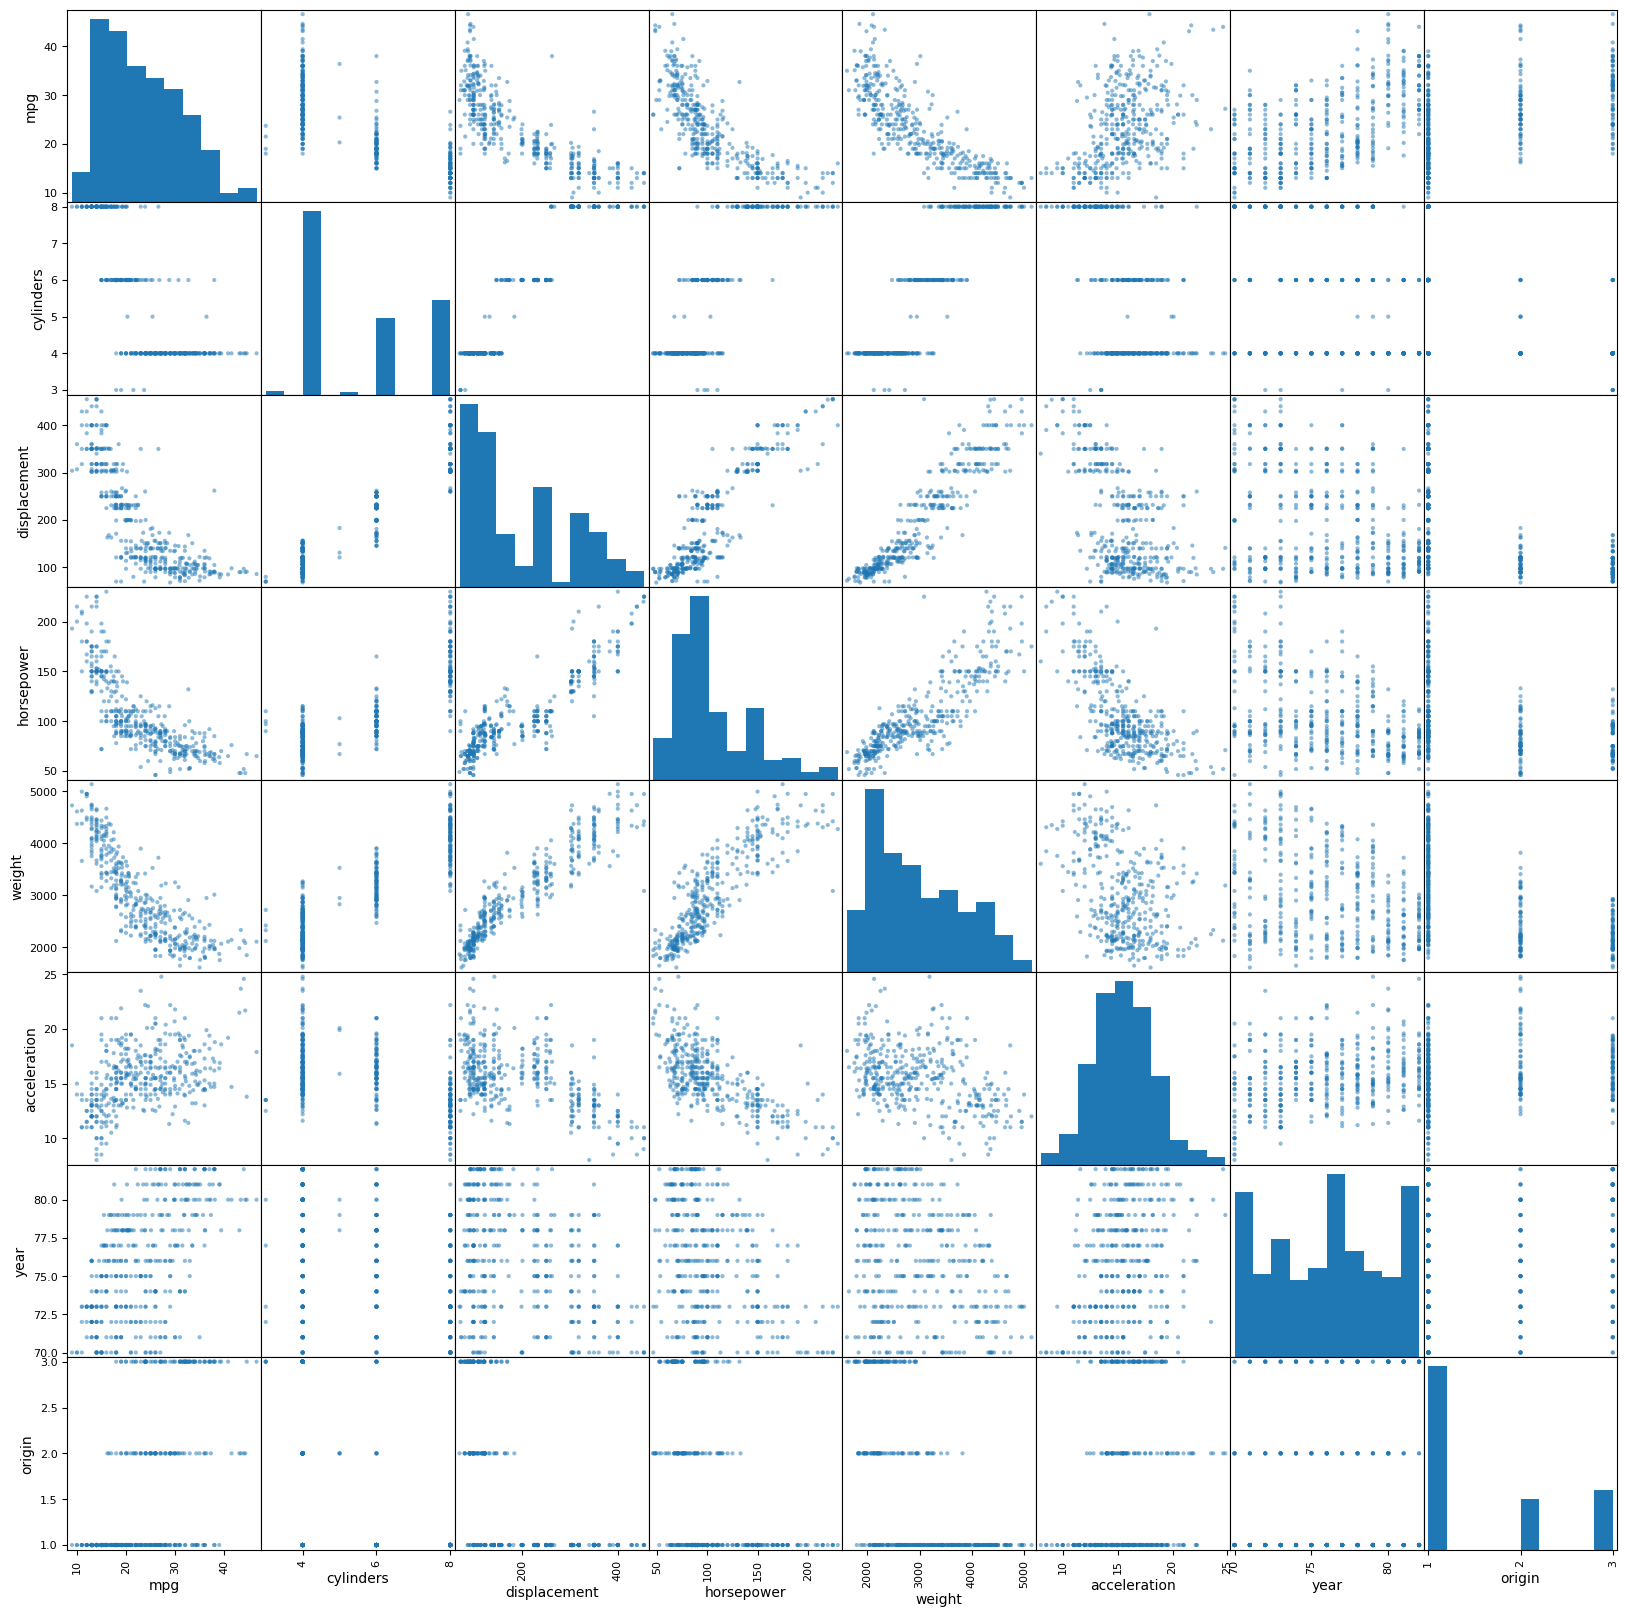

In [44]:
auto_data = load_data('auto')
pd.plotting.scatter_matrix(auto_data, figsize=(20,20));

In [27]:
auto_data.corr(numeric_only= True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [35]:
predictors = MS(auto_data.columns.drop(['name','mpg'])).fit_transform(auto_data)
regression_model = sm.OLS(auto_data['mpg'], predictors)
results = regression_model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2024-03-02 11:37 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
intercept        -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight            -0.0065   0.0007 -9.9288 0.0000  -0.0078 -0.0052
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
year               0.7508   0.0510 14.7288 0.0000   0.6506  0.8510
origin             1.4261   0.2781  5.1275 0.0000   0.8793  1.9730
------------------------------------------------------------------
Omnibus:               31.906       Durbin-Watson:          1.309 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       53.100
Skew:                  0.529        Prob(JB):               0.000 
Kurtosis:              4.460        Condition No.:          85850 
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

ii. Which predictors appear to have a statistically significant relationship to the response?

R// By looking at the P values the predictors that have a statistically significant relationship to the response are displacement, weight, year, and origin

Text(0, 0.5, 'Residual')

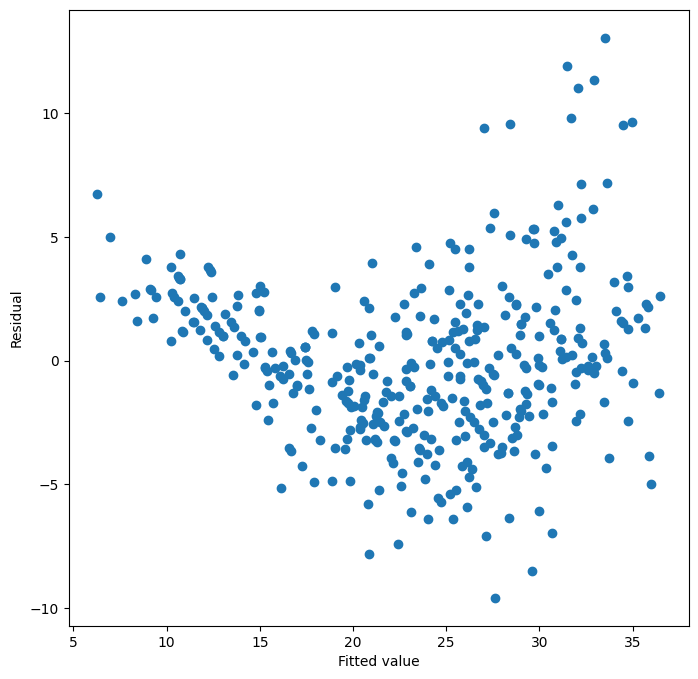

In [36]:
# Residual plots
fig, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

13

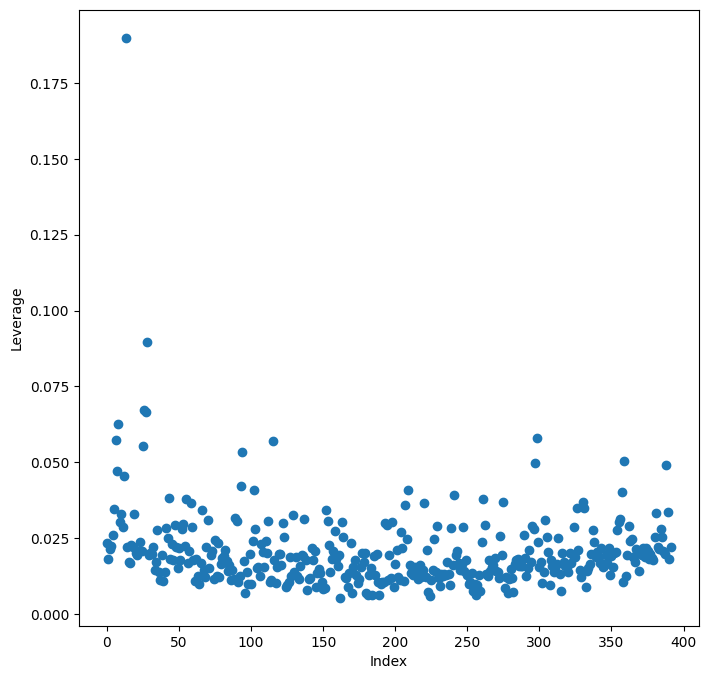

In [42]:
# graphic the leverage
import numpy as np
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(predictors.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

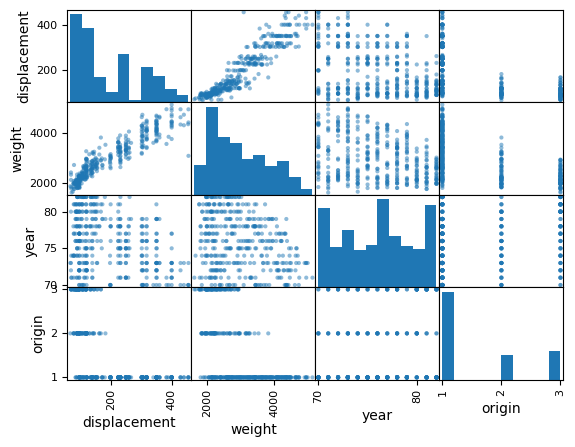

In [50]:
# let's first create a scatter plot from the significant variables: displacement, weight, year, and origin
pd.plotting.scatter_matrix(auto_data[["displacement", "weight", "year", "origin"]]);

In [54]:
# Seems that displacement and weight have some relation
predictors = MS(["displacement", "weight", "year", "origin", ("displacement","weight")]).fit_transform(auto_data)
regression_with_interaction = sm.OLS(auto_data["mpg"], predictors)
results2 =regression_with_interaction.fit()
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:               OLS               Adj. R-squared:      0.851    
Dependent Variable:  mpg               AIC:                 1983.8539
Date:                2024-03-02 12:38  BIC:                 2007.6815
No. Observations:    392               Log-Likelihood:      -985.93  
Df Model:            5                 F-statistic:         446.5    
Df Residuals:        386               Prob (F-statistic):  5.31e-158
R-squared:           0.853             Scale:               9.0956   
---------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
---------------------------------------------------------------------
intercept           -8.0068   3.7978  -2.1082 0.0357 -15.4738 -0.5397
displacement        -0.0715   0.0092  -7.7897 0.0000  -0.0895 -0.0534
weight              -0.0105   0.0007 -16.1459 0.0000  -0.0118 -0.0093
year                 0.8194   0.0452  18.1355 0.0000   0.7306  0.9083
origin               0.3567   0.2574   1.3858 0.1666  -0.1494  0.8629
displacement:weight  0.0000   0.0000   9.5056 0.0000   0.0000  0.0000
---------------------------------------------------------------------
Omnibus:              59.747        Durbin-Watson:           1.371   
Prob(Omnibus):        0.000         Jarque-Bera (JB):        159.527 
Skew:                 0.730         Prob(JB):                0.000   
Kurtosis:             5.764         Condition No.:           21032613
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 2.1e+07. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [56]:
# let's use just weight to show how to code this
predictors = MS(["displacement", poly("weight", degree=2), "year", "origin"]).fit_transform(auto_data)
regression_with_interaction_transformations = sm.OLS(auto_data["mpg"], predictors)
results3 =regression_with_interaction_transformations.fit()
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                  Adj. R-squared:         0.850    
Dependent Variable:      mpg                  AIC:                    1985.6640
Date:                    2024-03-02 12:56     BIC:                    2009.4916
No. Observations:        392                  Log-Likelihood:         -986.83  
Df Model:                5                    F-statistic:            444.1    
Df Residuals:            386                  Prob (F-statistic):     1.29e-157
R-squared:               0.852                Scale:                  9.1377   
-------------------------------------------------------------------------------
                            Coef.   Std.Err.    t     P>|t|    [0.025   0.975] 
-------------------------------------------------------------------------------
intercept                  -40.4294   3.7849 -10.6817 0.0000  -47.8711 -32.9878
displacement                 0.0011   0.0043   0.2434 0.8079   -0.0075   0.0096
poly(weight, degree=2)[0] -107.0196   8.4612 -12.6482 0.0000 -123.6555 -90.3837
poly(weight, degree=2)[1]   30.1175   3.2076   9.3894 0.0000   23.8110  36.4240
year                         0.8272   0.0454  18.2229 0.0000    0.7380   0.9165
origin                       0.5188   0.2527   2.0532 0.0407    0.0220   1.0156
-------------------------------------------------------------------------------
Omnibus:                   64.872           Durbin-Watson:              1.369  
Prob(Omnibus):             0.000            Jarque-Bera (JB):           163.793
Skew:                      0.811            Prob(JB):                   0.000  
Kurtosis:                  5.720            Condition No.:              12914  
===============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

# 11 

This question should be answered using the Carseats data set.

In [57]:
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from matplotlib.pyplot import subplots

In [61]:
carseats_df = load_data("Carseats")
carseats_df[:4]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes


(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US

In [63]:
predictors = MS(carseats_df[["Price","Urban", "US"]]).fit_transform(carseats_df)
regression_model = sm.OLS(carseats_df["Sales"], predictors)
results = regression_model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2024-03-02 14:11 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
Urban[Yes]    -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US[Yes]        1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
------------------------------------------------------------------
Omnibus:               0.676        Durbin-Watson:           1.912
Prob(Omnibus):         0.713        Jarque-Bera (JB):        0.758
Skew:                  0.093        Prob(JB):                0.684
Kurtosis:              2.897        Condition No.:           628  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [66]:
predictors2 = MS(carseats_df[["Price", "US"]]).fit_transform(carseats_df)
regression_model2 = sm.OLS(carseats_df["Sales"], predictors2)
results2 = regression_model2.fit()
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2024-03-02 14:56 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
intercept     13.0308    0.6310   20.6518  0.0000  11.7903  14.2713
Price         -0.0545    0.0052  -10.4161  0.0000  -0.0648  -0.0442
US[Yes]        1.1996    0.2585    4.6415  0.0000   0.6915   1.7078
------------------------------------------------------------------
Omnibus:               0.666        Durbin-Watson:           1.912
Prob(Omnibus):         0.717        Jarque-Bera (JB):        0.749
Skew:                  0.092        Prob(JB):                0.688
Kurtosis:              2.895        Condition No.:           607  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [73]:
results2.params["intercept"]+ 2* results2.bse["intercept"]

14.292745370006262

Text(0, 0.5, 'Studentized Residual')

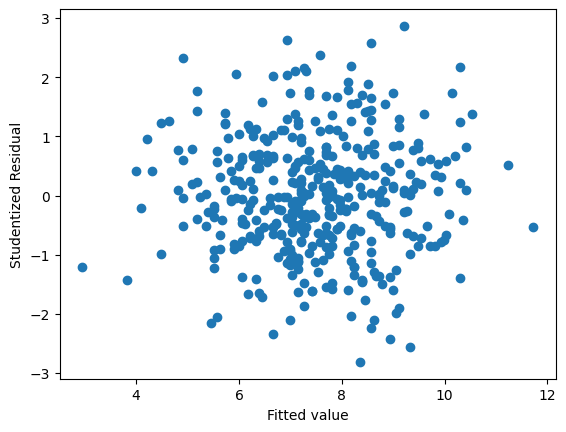

In [78]:
ax = subplots()[1]
ax.scatter(results2.fittedvalues, results2.get_influence().resid_studentized)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Studentized Residual')


42

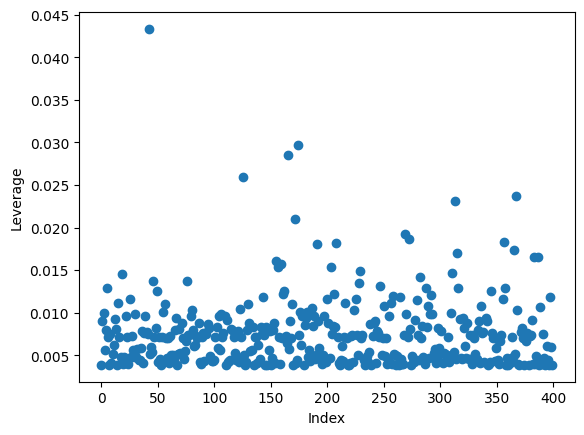

In [89]:
ax = subplots()[1]
ax.scatter(np.arange(predictors.shape[0]), results2.get_influence().hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax( results2.get_influence().hat_matrix_diag)

In [87]:
(len(results2.params)-1+1)/predictors2.shape[0]

0.0075

Some values are above 0.0075 which could indicate they are high-leverage observations